# INF8775 TP2

In [40]:
import torch
import math

if not torch.cuda.is_available():
    import numpy as np
else:
    import cupy as np

import matplotlib.pyplot as plt


[[0 0]
 [0 4]
 [4 0]
 [4 4]
 [0 2]]


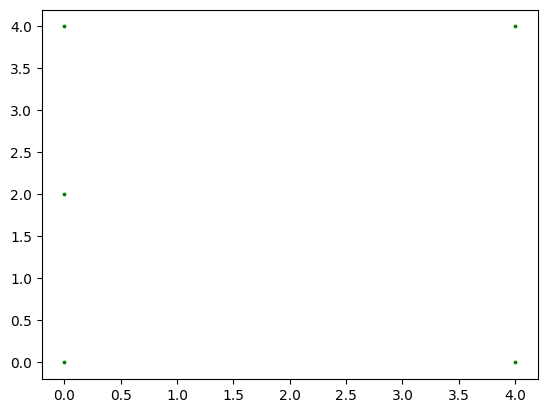

In [41]:
def load_file(file: str):
    with open(file) as f:
        data = f.read().replace('\t', ' ').splitlines()
        N = int(data[0])
        oneLineMatrix = " ".join(data[1:]).split(' ')
        matrix = np.array(list(map(int, oneLineMatrix))).reshape(N, 2)
    return N, matrix


file = "data/DP_N5_0"
n, m = load_file(file)
# print(n)
print(m)
plt.scatter(m[:, 0], m[:, 1], color="green", s=3)
plt.show()


In [42]:

def euclidianDist(a, b):
    sq = (a[0] - b[0])**2 + (a[1] - b[1])**2
    return math.floor(np.sqrt(sq))


print(m[0], m[3])
euclidianDist(m[0], m[3])


[0 0] [4 4]


5

## Greedy

In [43]:
import copy


def greeddyTSP(T: np.ndarray):
    result = [0]
    cityList = copy.deepcopy(T)
    dist = 0
    # print(cityList)
    idx = 0
    i = 0
    while True:
        city = cityList[idx]
        cityList = np.delete(cityList, idx, axis=0)
        if (cityList.size == 0):
            return result, dist
        distances = np.array([euclidianDist(c, city) for c in cityList])
        dist += min(distances)
        # print(distances)
        idx = np.argmin(distances)
        # print(x)
        y = np.argmin(np.array([euclidianDist(c, cityList[idx]) for c in T]))

        # print(y)
        result.append(y)
        # print(f"{i = :2d} | Distances : {distances}")
        # print(f"   argmin in {idx = :2d}, city in {cityList[idx]}, global index {y = :2d}")
        # print(f"{abs(T - cityList[idx]) = }")
        i += 1


indexes, dist = greeddyTSP(m)
print(f"Distance : {dist}")


Distance : 12


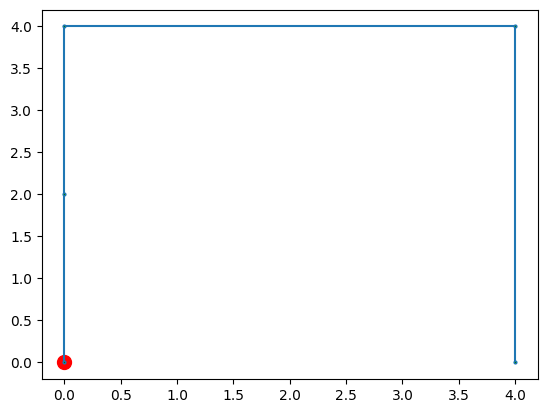

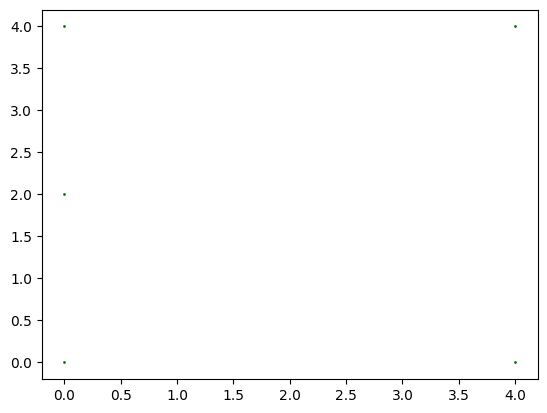

In [44]:
X, Y = [], []
for x in indexes:
    X.append(m[x, 0])
    Y.append(m[x, 1])

plt.plot(X, Y, marker="o", markersize=2, markerfacecolor="green")
plt.scatter(X[0], Y[0], color="red", s=100, marker="o")
plt.show()
plt.scatter(X, Y, color="green", s=1)
plt.show()


## Dynamic programming

In [45]:
S = set(range(1, n))
K = S - {1}
print(K, S)


{2, 3, 4} {1, 2, 3, 4}


In [46]:
cityList = m

path_dict = {}
def dynProg(d, i: int, S: set):
    if S == {}:
        key = (i, tuple(S))
        return d[key]
    if i in S:
        return math.inf
    min_pt, min_dist = -1, math.inf
    for j in S:
        dij = euclidianDist(cityList[i], cityList[j])
        S_ = S - {j}
        key = (i, tuple(S_))
        if key not in d:
            d[key] = dynProg(d, j, S_)
        dist = dij + d[key]
        if dist < min_dist :
            min_pt, min_dist = j, dist
    key = (i, tuple(S))
    path_dict[key] = min_pt
    d[key] = min_dist
    return min_dist


S = set(range(1, n))
d = {}
for i in S:
    d[(i, tuple())] = euclidianDist(cityList[0], cityList[i])

print(S)
print(d)
h = dynProg(d, 0, S)
min_pt, min_dist = -1, math.inf
for j in S:
    dij = euclidianDist(cityList[0], cityList[j])
    S_ = S - {j}
    key = (0, tuple(S_))
    if key not in d:
        d[key] = dynProg(d, j, S_)
    dist = dij + d[key]
    if dist < min_dist :
        min_pt, min_dist = j, dist
d[0, tuple(S)] = min_dist

for k, v in d.items():
    print(f"{k} : {v}")
print(f"Paths values : ")
for k, v in path_dict.items():
    print(f"{k} : {v}")
print(d[0, tuple(S)])

{1, 2, 3, 4}
{(1, ()): 4, (2, ()): 4, (3, ()): 5, (4, ()): 2}
(1, ()) : 4
(2, ()) : 4
(3, ()) : 5
(4, ()) : 2
(3, (4,)) : 9
(2, (4,)) : 9
(4, (3,)) : 6
(2, (3,)) : 6
(2, (3, 4)) : 10
(1, (3, 4)) : 10
(4, (2,)) : 6
(3, (2,)) : 6
(3, (2, 4)) : 10
(1, (2, 4)) : 10
(4, (2, 3)) : 10
(1, (2, 3)) : 10
(1, (2, 3, 4)) : 12
(0, (2, 3, 4)) : 12
(4, (1,)) : 4
(3, (1,)) : 4
(3, (1, 4)) : 8
(2, (1, 4)) : 8
(4, (1, 3)) : 8
(2, (1, 3)) : 8
(2, (1, 3, 4)) : 12
(0, (1, 3, 4)) : 12
(4, (1, 2)) : 8
(3, (1, 2)) : 8
(3, (1, 2, 4)) : 12
(0, (1, 2, 4)) : 12
(4, (1, 2, 3)) : 12
(0, (1, 2, 3)) : 12
(0, (1, 2, 3, 4)) : 14
Paths values : 
(3, (4,)) : 4
(4, (3,)) : 3
(2, (3, 4)) : 4
(4, (2,)) : 2
(3, (2, 4)) : 4
(4, (2, 3)) : 2
(1, (2, 3, 4)) : 4
(4, (1,)) : 1
(3, (1, 4)) : 4
(4, (1, 3)) : 1
(2, (1, 3, 4)) : 3
(4, (1, 2)) : 1
(3, (1, 2, 4)) : 2
(4, (1, 2, 3)) : 1
(0, (1, 2, 3, 4)) : 4
14


## Algorithme approximatif

In [60]:
import sys


class Graph:
    def __init__(self, cityList: np.ndarray):
        N = cityList.shape[0]
        self.size: int = N
        self.v: list[int] = list(range(N))
        edges = np.zeros((N,N), dtype=int)
        for city1 in range(N):
            for city2 in range(city1, N):
                c1, c2 = cityList[city1], cityList[city2]
                edges[city1, city2] = euclidianDist(c1, c2)
                edges[city2, city1] = edges[city1, city2]
        for city in range(N) :
            edges[city, city] = sys.maxsize
        self.e: np.ndarray = edges
    
    def getNeighbors(self, i: int):
        return list(set(range(self.size)) - {i})

g = Graph(m)

def prim(g: Graph):
    x = int(g.e.argmin())
    startEdge = x//g.size, x%g.size
    
    vertices = [startEdge[0], startEdge[1]]
    toCheck = []
    for v in vertices:
        toCheck += g.getNeighbors(v)

[[9223372036854775807                   4                   4
                    5                   2]
 [                  4 9223372036854775807                   5
                    4                   2]
 [                  4                   5 9223372036854775807
                    4                   4]
 [                  5                   4                   4
  9223372036854775807                   4]
 [                  2                   2                   4
                    4 9223372036854775807]]
(0, 4)
